In [110]:
import numpy as np
from bisect import bisect_left
import matplotlib.pyplot as plt

In [111]:
class Environment :
    def __init__(self, M, gamma, pos, vel) :
        self.M = M
        self.m = M.shape[0]
        self.n = M.shape[1]
        self.gamma = gamma
        self.actionList = [-1, 0, 1]
        self.pos = pos
        self.vel = vel
    
        self.R = -1.0*np.ones((self.m, self.n))
        self.R[self.m-1, :] = 0
#         self.currRow = bisect_left(pos, curr[0])
#         self.currCol = bisect_left(vel, curr[1])
        self.V = np.zeros(self.R.shape)
        self.policy = np.array(np.empty(self.R.shape), dtype=np.int64)
        self.policy[:] = -1
        
    def getVel(self, pos, vel, action) :
        return (vel + (action * 0.001) + (np.cos(3*pos) * (-0.0025)))
    
    def getPos(self, pos, vel) :
        return (vel + pos)
                
    def getSuccessor(self, i, j, actionVal) :
        velocity = self.getVel(self.pos[i], self.vel[j], actionVal)
        position = self.getPos(self.pos[i], velocity)
        
        pos_idx = bisect_left(pos, position)
        vel_idx = bisect_left(vel, velocity)
        pos_idx = min(pos_idx, self.m-1)
        vel_idx = min(vel_idx, self.n-1)
        return self.V[pos_idx, vel_idx], self.R[pos_idx, vel_idx]
        
    def Bellmann(self, i, j) :
        bestAction = "None"
        max_val = -1e7
        for action in self.actionList :
            V_successor, reward = self.getSuccessor(i, j, action)
            val = reward + V_successor
            if(max_val < val) :
                max_val = val
                bestAction = action
                              
        return max_val, bestAction
                
    def ValueIteration(self) :
        iter = 0
        MAX_ITER = 1000
        while(iter < MAX_ITER) :
            iter += 1
            delta = 0
            for i in range(self.m) :
                for j in range(self.n) :
                    prev = self.V[i, j]
                    self.V[i, j], self.policy[i, j] = self.Bellmann(i, j)
                    delta = max(delta, abs(prev - self.V[i, j]))
            if(iter % 50 == 0) :
                print("\nIteration", iter)
                print("\nDelta : ", delta)
                print("\nValue : \n", self.V)
            if(delta < 0.01) :
                break
                
        if(iter == MAX_ITER) :
            print("\nValue iteration did not converge in", iter, "iterations")
        else :
            print("\nValue Iteration converges in", iter, "steps")
            print("\nOptimal Value : \n", self.V)
            print("\nOptimal Policy : \n", self.policy)

# Driver Program 

In [ ]:
pos = np.linspace(-1.2, 0.6, 100)
vel = np.linspace(-0.07, 0.07, 100)
gamma = 1
M = np.array([[[pos[i], vel[j]] for i in range(len(vel))] for j in range(len(pos))])
envObj = Environment(M, gamma, pos, vel)
envObj.ValueIteration
np.savetxt("Value.txt", envObj.V, fmt="%5.2f")
np.savetxt("Policy.txt", envObj.policy, fmt="%d")

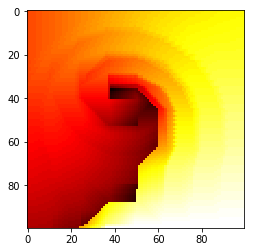

In [112]:
plt.imshow(envObj.V, cmap = "hot" , interpolation="nearest")
plt.show()

In [114]:
a = np.linspace(1, 2, 10)
a

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])